# Clustering

### K-Means Clustering

In [ ]:
#importing libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [26]:
data=pd.read_csv("C:/Users/USER/Downloads/Wine_clust.csv")
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
#calculating wcss for different k
#elbow method to find out the ideal k

In [27]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
  km.fit(data)
  wcss.append(km.inertia_)


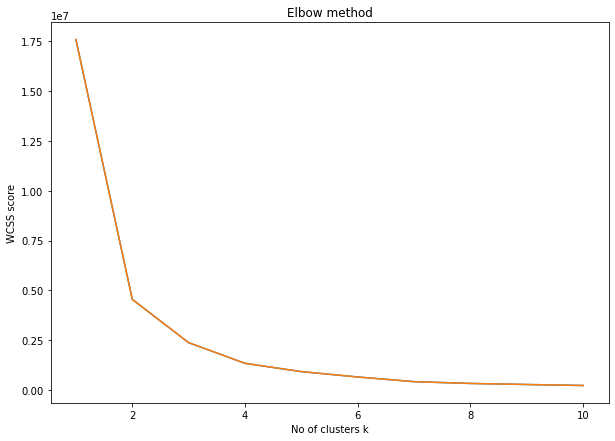

In [28]:

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No of clusters k")
plt.ylabel("WCSS score")
plt.show()

In [47]:
pca=PCA()
X=pca.fit_transform(data)
X

array([[ 3.18564734e+02,  2.14927074e+01,  3.13416444e+00, ...,
        -7.41949908e-02, -3.11902699e-02,  8.25826958e-02],
       [ 3.03099217e+02, -5.36404662e+00,  6.82690572e+00, ...,
        -1.32075232e-02, -4.25483447e-02,  1.76817336e-02],
       [ 4.38062562e+02, -6.53714550e+00, -1.11209161e+00, ...,
        -2.17276451e-01, -4.16184183e-02, -3.33207650e-02],
       ...,
       [ 8.84581213e+01,  1.87761280e+01, -2.23831192e+00, ...,
         2.13180279e-01,  9.45209270e-02,  3.58078825e-02],
       [ 9.34562758e+01,  1.86706444e+01, -1.78932234e+00, ...,
         1.89786770e-02, -5.86545260e-02,  1.30833174e-01],
       [-1.86944727e+02, -2.14031162e-01, -5.63446397e+00, ...,
        -2.00026266e-01,  7.62337731e-03,  2.05184754e-02]])

In [51]:
km=KMeans(n_clusters=4,init="k-means++",n_init=10,random_state=101)
labels=km.fit_predict(X)
unique_labels=np.unique(labels)

In [106]:
km

KMeans(n_clusters=2, random_state=101)

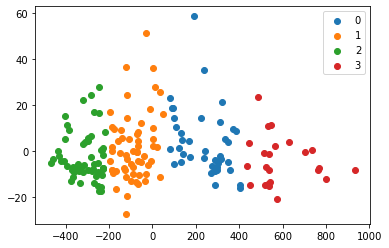

In [52]:
for i in unique_labels:
    plt.scatter(X[labels==i,0],X[labels==i,1],label=i)
plt.legend()
plt.show()

In [37]:
data['Cluster']=km.labels_
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


# Hierarchial Clustering

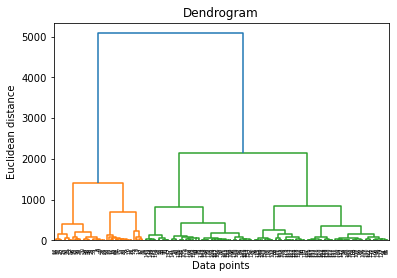

In [94]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.show()

In [95]:
from sklearn.cluster import AgglomerativeClustering

In [104]:
hc=AgglomerativeClustering(n_clusters=2,linkage="ward")

TypeError: fit() missing 1 required positional argument: 'X'

In [97]:
y_hc=hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [98]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,y_hc)
print(sil_avg)

0.6587289898875907


In [67]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,labels)
print(sil_avg)

0.5605916380645237


In [68]:
km=KMeans(n_clusters=3,init="k-means++",n_init=10,random_state=101)
labels=km.fit_predict(X)
unique_labels=np.unique(labels)

In [69]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,labels)
print(sil_avg)

0.5711434181378577


In [70]:
km=KMeans(n_clusters=2,init="k-means++",n_init=10,random_state=101)
labels=km.fit_predict(X)
unique_labels=np.unique(labels)

In [71]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,labels)
print(sil_avg)

0.6568526495082573


# DBSCAN

In [90]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=12.5, min_samples=2).fit(X)
labels=dbscan.fit_predict(X)
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [91]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,labels)
print(sil_avg)

0.19021729734435164
